In [1]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

In [16]:
%matplotlib nbagg

In [47]:
from IPython.display import set_matplotlib_formats
%matplotlib inline

set_matplotlib_formats('png', 'pdf')

In [3]:
# Trenberth 1991
b0 = [-0.003, -0.033, -0.037, -0.013, -0.132, -0.188, 0.172, 0.468, 0.172, -0.188, -0.132, -0.013, -0.037, -0.033, -0.003]

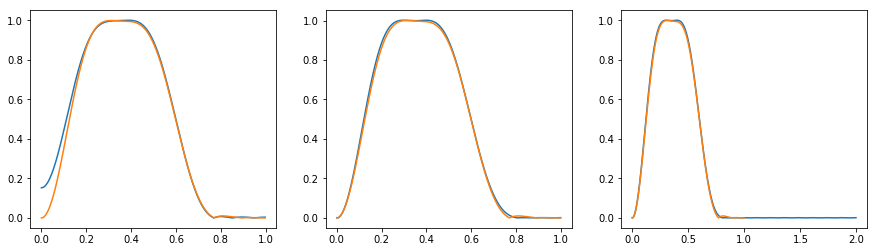

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# windowing method
b = sig.firwin(15, [0.11, 0.6], width=0.3, pass_zero=False)

w, h = sig.freqz(b)
axs[0].plot(w/np.pi, abs(h))
w, h = sig.freqz(b0)
axs[0].plot(w/np.pi, abs(h))

# Parks-McClellan algorithm
fs = 2
b = sig.remez(15, np.array([0, 0, 0.3, 0.42, 0.8, fs/2]), [0, 1, 0], fs=fs)
# fs/2 -> stopband must go up to Nyquist frequency

w, h = sig.freqz(b)
axs[1].plot(w*fs/2/np.pi, abs(h))
w, h = sig.freqz(b0)
axs[1].plot(w/np.pi, abs(h))

# with double the sampling frequency (4 x daily instead of 2 x)
fs = 4
b = sig.remez(31, np.array([0, 0, 0.3, 0.42, 0.8, fs/2]), [0, 1, 0], fs=fs)

w, h = sig.freqz(b)
axs[2].plot(w*fs/2/np.pi, abs(h))
w, h = sig.freqz(b0)
axs[2].plot(w/np.pi, abs(h))

<cite data-cite="2031184/7854AWU5"></cite> uses a filter whose coefficients are given above as ``b0``. His data sampling frequency is 2 x daily. I tried to reconstruct his filter by trial-and-error using different methods available in ``scipy``. I didn't get super close, but above are some of the better results.

Plots show frequency response (in day$^{-1}$) of the filters, **blue** is always my construction, **orange** the Trenberth filter.

I need to construct my own filter if I want to apply it, for example, to the reanalysis output with 4 x daily fields if I don't want to subsample first. The third panel in the figure constructs the filter for the 4 x daily frequencies, leaving all the other parameters intact.  I also doubled the number of points in the filter for the 4 x daily operation.

**Question**: Do I need to detrend before applying filter?

<IPython.core.display.Javascript object>


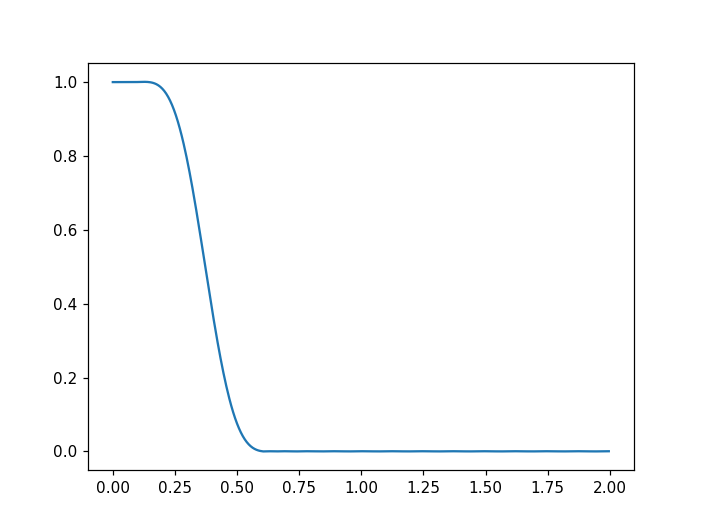

In [23]:
b = sig.remez(31, np.array([0, 0.15, 0.6, fs/2]), [1, 0], fs=fs)
fig, axs = plt.subplots()
w, h = sig.freqz(b)
axs.plot(w*fs/2/np.pi, abs(h))

<IPython.core.display.Javascript object>


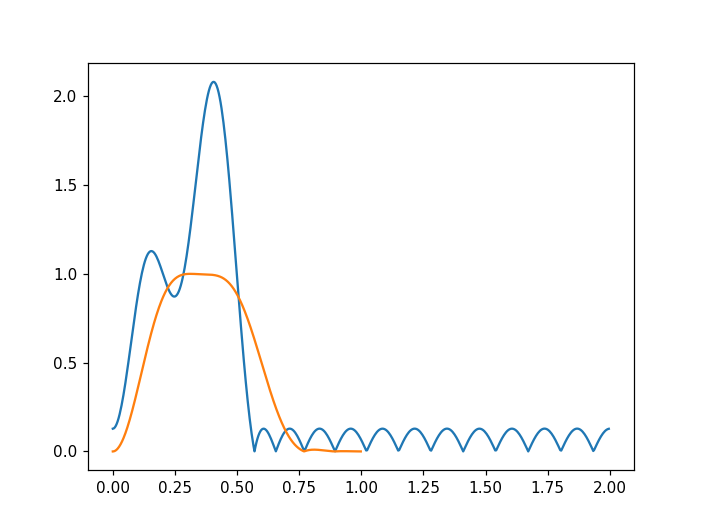

In [45]:
b = sig.remez(31, [0, 0, 0.1, 0.3, 0.6, 2], [0, 1, 0], fs=4)
fig, axs = plt.subplots()
w, h = sig.freqz(b)
axs.plot(w*2/np.pi, abs(h))
w, h = sig.freqz(b0)
axs.plot(w/np.pi, abs(h))